# **<span style="color:orange">Data Analysis on Rainfall Dataset</span>**

### Required Libraries.....................................................

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **<span style="color:yellow">Loading Dataset</span>**

In [ ]:
data = pd.read_csv('rainfall.csv')
data.head()

,date,rainfall,temperature,humidity,wind_speed,weather_condition
0,2022-01-01,12.5,15.2,78.0,8.5,Rainy
1,2022-01-02,8.2,17.8,65.0,5.2,Rainy
2,2022-01-03,0.0,20.1,52.0,3.1,Sunny
3,2022-01-04,3.7,18.6,71.0,6.7,Rainy
4,2022-01-05,21.1,14.8,82.0,9.3,Rainy


## **<span style="color:yellow">Handling Null Values</span>**

### **Checking is there any Null value or not**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               54 non-null     object 
 1   rainfall           53 non-null     float64
 2   temperature        53 non-null     float64
 3   humidity           53 non-null     float64
 4   wind_speed         53 non-null     float64
 5   weather_condition  53 non-null     object 
dtypes: float64(4), object(2)
memory usage: 2.7+ KB


### **We have some Null values. so we need to remove those tuples**

In [ ]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53 entries, 0 to 52
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               53 non-null     object 
 1   rainfall           53 non-null     float64
 2   temperature        53 non-null     float64
 3   humidity           53 non-null     float64
 4   wind_speed         53 non-null     float64
 5   weather_condition  53 non-null     object 
dtypes: float64(4), object(2)
memory usage: 2.9+ KB


**<span style="color:red">Now we successfully remove Null values.</span>**

<ul>
    <li>Previously we Have 54 tuples and one of them have Null values.</li>
    <li>Now we have 53 tuples without any Null values.</li>
</ul>



<ul>
    <li>We used <b>.info()</b> for check Null value was there or not.</li>
    <li>then we used <b>.dropna()</b> for remove Null values from data.</li>
</ul>


## **<span style="color:yellow">Handling Duplicate tuple</span>**

In [ ]:
print("Total number of duplicate tuples : ",data.duplicated().sum()) 

Total number of duplicate tuples :  0


**<span style="color:red">There is no duplicate tuples</span>**

<ul>
    <li>We used <b>.duplicated().sum()</b> for check Duplicate value was there or not.</li>
</ul>


<br>
<br>
<br>

## **<span style="color:yellow">Convert Object type date to time series date</span>**

In [ ]:
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')
data.head()

,date,rainfall,temperature,humidity,wind_speed,weather_condition
0,2022-01-01,12.5,15.2,78.0,8.5,Rainy
1,2022-01-02,8.2,17.8,65.0,5.2,Rainy
2,2022-01-03,0.0,20.1,52.0,3.1,Sunny
3,2022-01-04,3.7,18.6,71.0,6.7,Rainy
4,2022-01-05,21.1,14.8,82.0,9.3,Rainy


<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

## **<span style="color:yellow">Start Analysis</span>**

In [ ]:
data[['rainfall','temperature','humidity','wind_speed']].describe()

,rainfall,temperature,humidity,wind_speed
count,53.000000,53.000000,53.000000,53.000000
mean,9.049057,17.950943,69.245283,6.403774
std,6.712521,2.500663,11.969361,2.209069
min,0.000000,13.900000,44.000000,2.100000
25%,3.900000,16.100000,62.000000,4.700000
50%,8.300000,17.800000,72.000000,6.700000
75%,14.800000,19.400000,78.000000,8.300000
max,21.800000,23.400000,89.000000,10.500000


In [ ]:
print("Starting Date :",min(data['date']).strftime('%d-%B-%Y'))
print("Ending Date :",max(data['date']).strftime('%d-%B-%Y'))

Starting Date : 01-January-2022
Ending Date : 22-February-2022


##### <span style="color:red">This data is in the range <b>1st Jan to 22th Feb in 2022</b></span>

<br>
<br>
<br>

####  <span><b style="color:skyblue">According to the below Pie chart -</b> <br>The distribution of weather conditions from<br>1st-Jan-2022  to 22th-Feb-2022<br><br>79.2% days were Rainy and 20.8% days were Sunny</span>

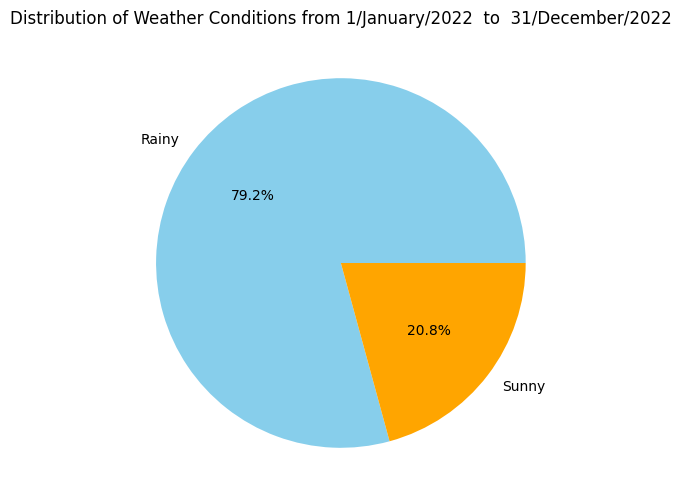

In [63]:
weather_counts = data['weather_condition'].value_counts()


plt.figure(figsize=(8, 6))
weather_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'orange', 'green', 'red'])
plt.title('Distribution of Weather Conditions from 1/January/2022  to  31/December/2022')
plt.ylabel('') 
plt.show()

##### Plot all the data of Railfall , Temperature , Humidity and Wind Speed with respect of time from 1st Janury to 22nd February

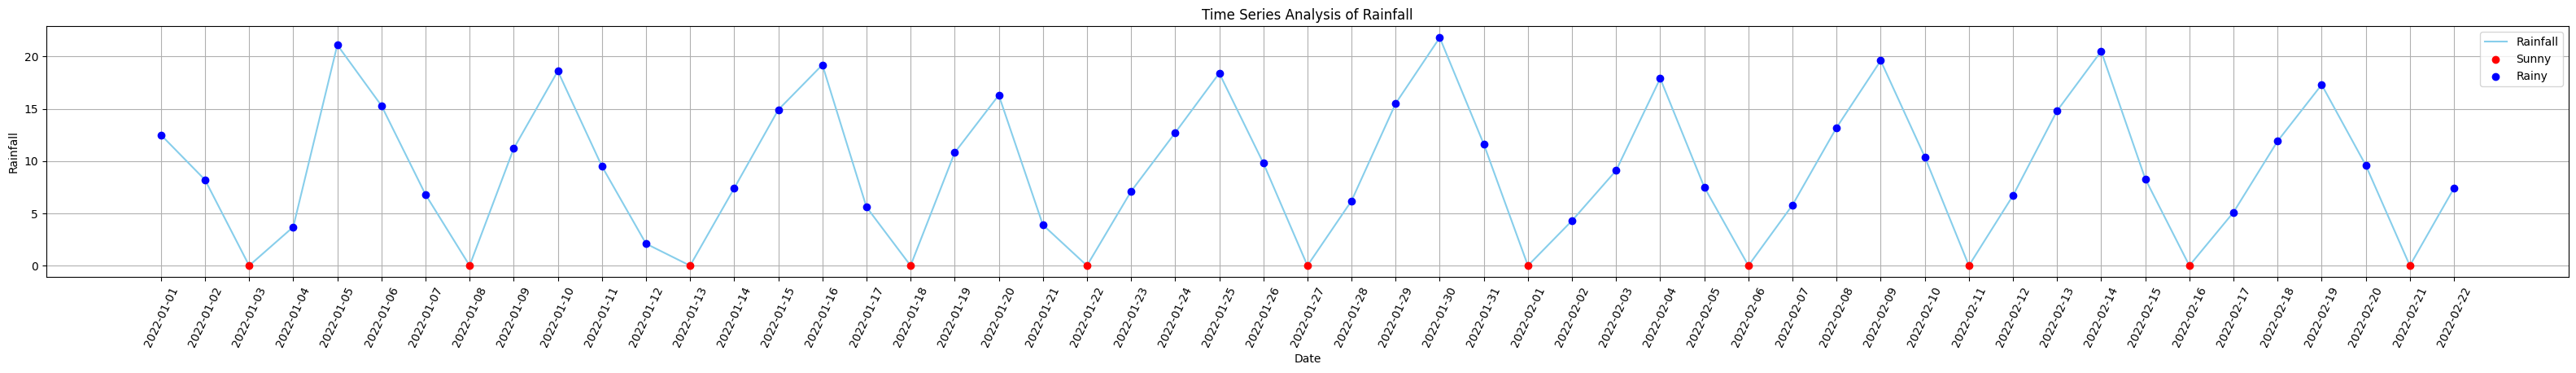

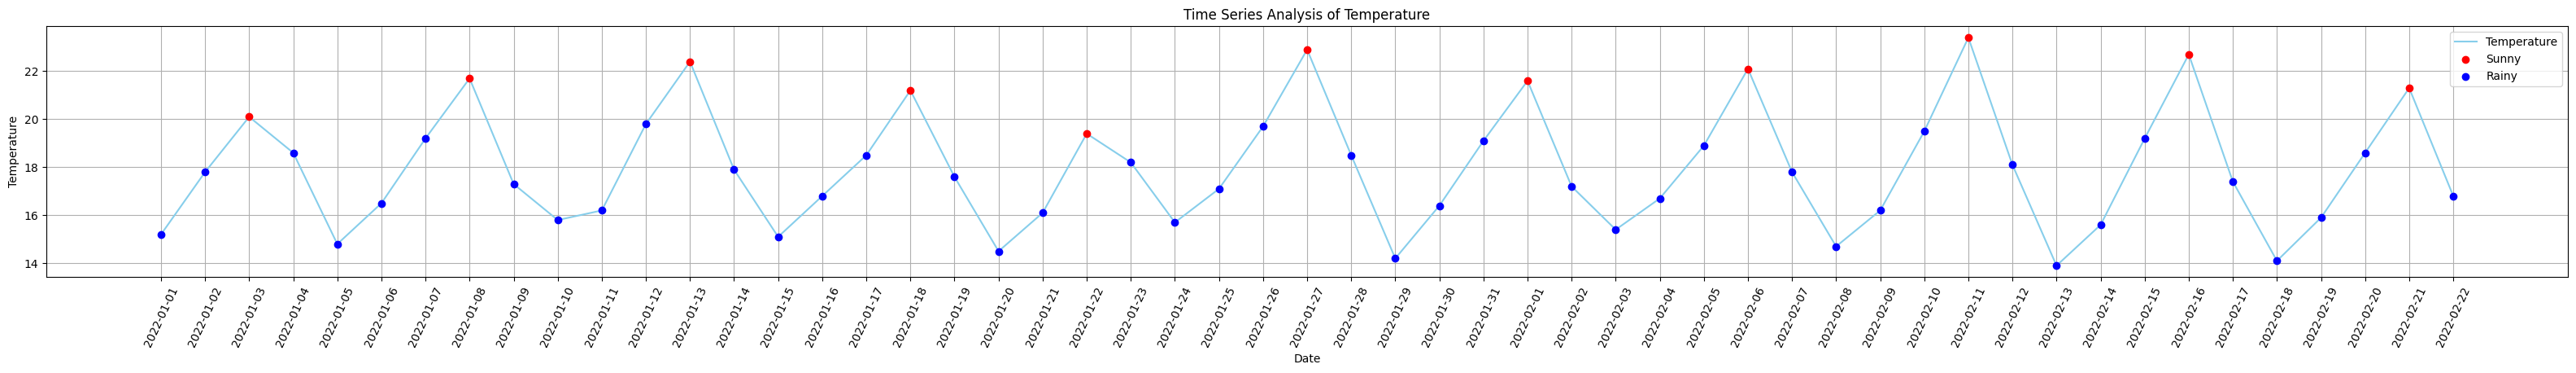

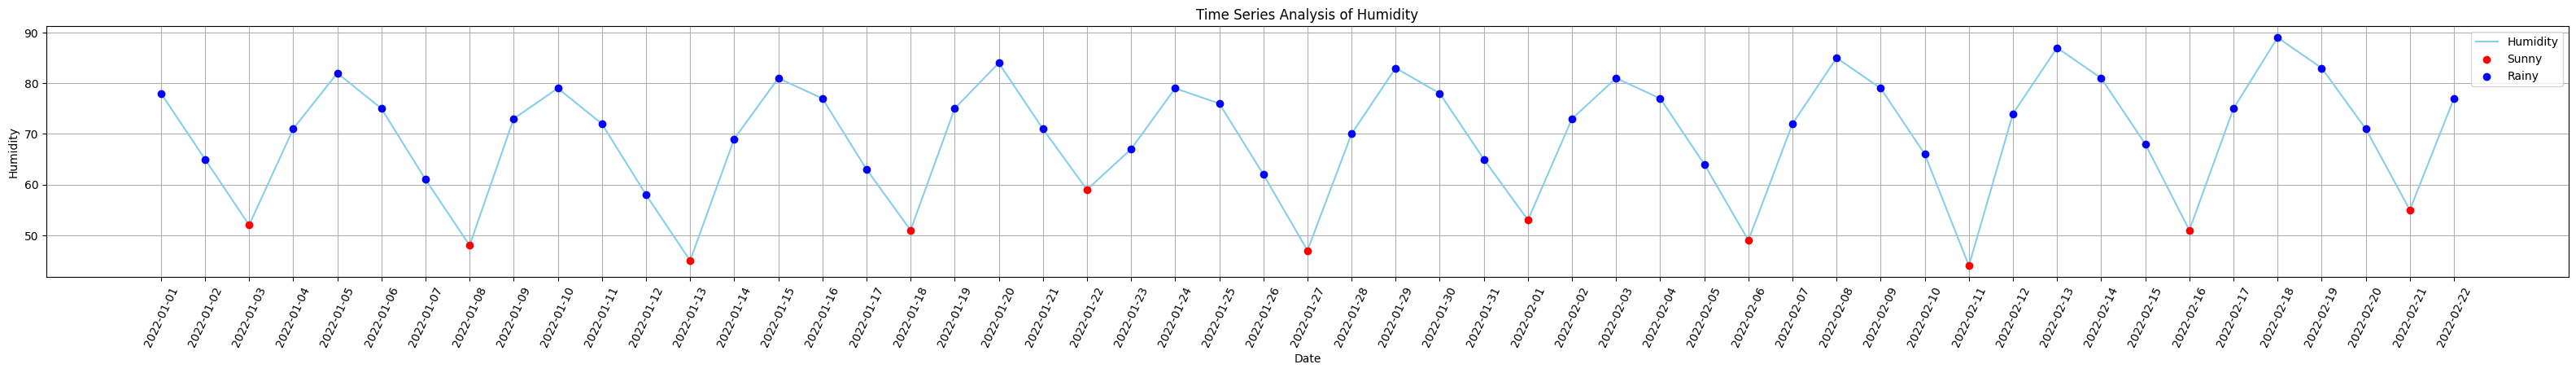

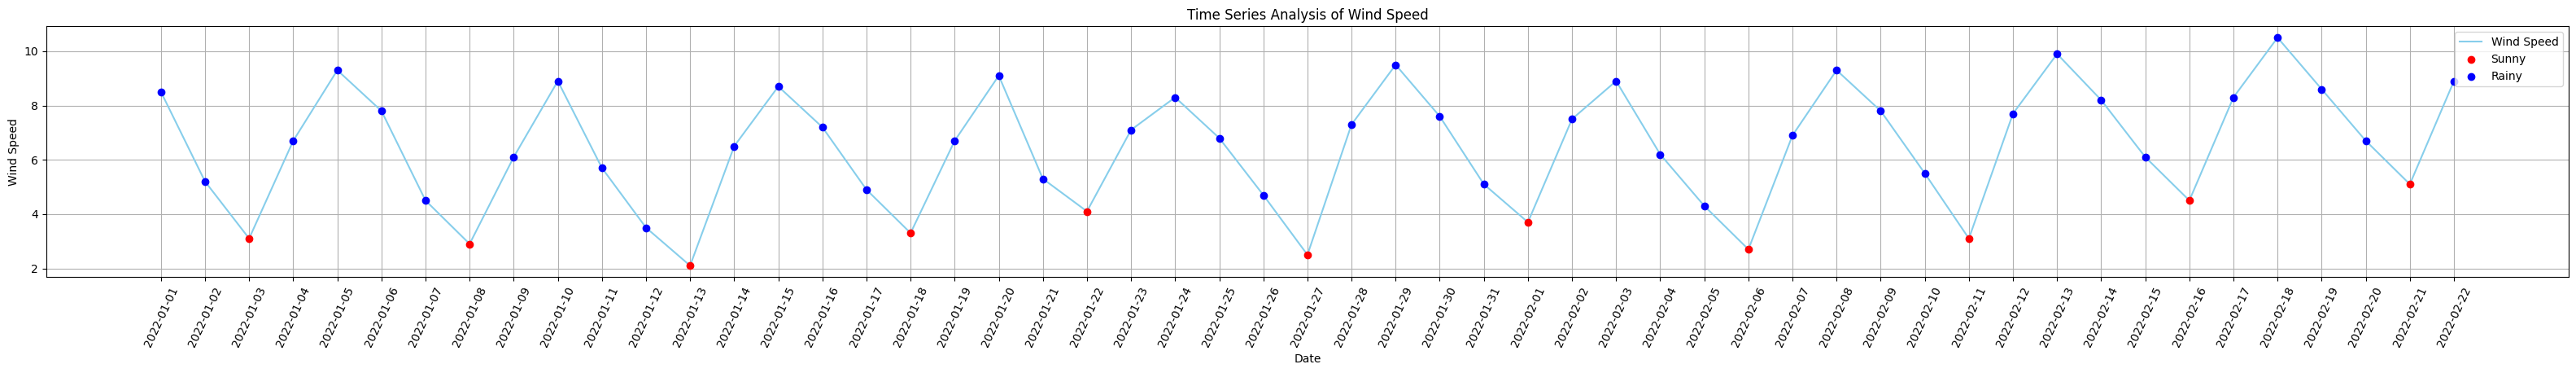

In [ ]:
def plot_time_series_with_conditions(data, column, label, color, ylabel, title):
    plt.figure(figsize=(40, 4))
    plt.plot(data['date'], data[column], label=label, color=color)
    
    sunny_data = data[data['weather_condition'] == 'Sunny']
    plt.scatter(sunny_data['date'], sunny_data[column], color='red', label='Sunny', zorder=5)

    rainy_data = data[data['weather_condition'] == 'Rainy']
    plt.scatter(rainy_data['date'], rainy_data[column], color='blue', label='Rainy', zorder=5)
    
    plt.xlabel('Date')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(data['date'], rotation=65)
    plt.legend()
    plt.grid(True)
    plt.show()

plot_time_series_with_conditions(data, 'rainfall', 'Rainfall', 'skyblue', 'Rainfall', 'Time Series Analysis of Rainfall')
plot_time_series_with_conditions(data, 'temperature', 'Temperature', 'skyblue', 'Temperature', 'Time Series Analysis of Temperature')
plot_time_series_with_conditions(data, 'humidity', 'Humidity', 'skyblue', 'Humidity', 'Time Series Analysis of Humidity')
plot_time_series_with_conditions(data, 'wind_speed', 'Wind Speed', 'skyblue', 'Wind Speed', 'Time Series Analysis of Wind Speed')

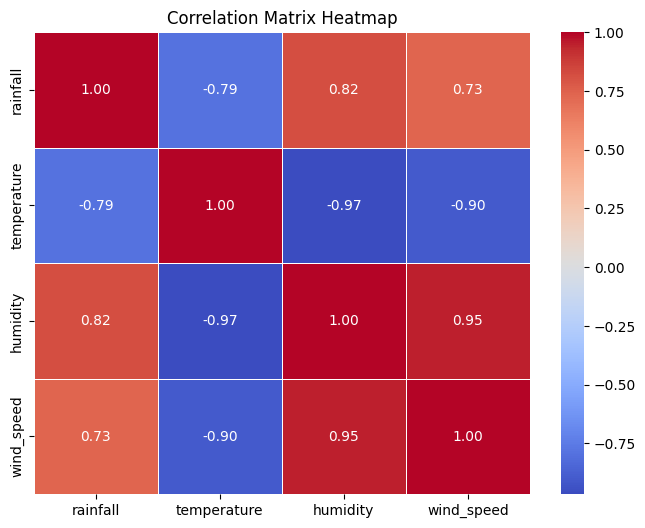

In [66]:
correlation_matrix = data[['rainfall', 'temperature', 'humidity', 'wind_speed']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [67]:
The heatmap visualizes the **correlation matrix** of the numerical variables in the dataset: `rainfall`, `temperature`, `humidity`, and `wind_speed`. Here's what it represents:

1. **Correlation Coefficients**:
    - The values range from **-1 to 1**:
      - **1**: Perfect positive correlation (as one variable increases, the other also increases).
      - **-1**: Perfect negative correlation (as one variable increases, the other decreases).
      - **0**: No correlation (no linear relationship between the variables).

2. **Key Observations**:
    - **Rainfall vs. Humidity**: High positive correlation (**0.82**), indicating that higher rainfall is associated with higher humidity.
    - **Temperature vs. Humidity**: Strong negative correlation (**-0.97**), meaning higher temperatures are associated with lower humidity.
    - **Temperature vs. Wind Speed**: Strong negative correlation (**-0.90**), suggesting that higher temperatures are linked to lower wind speeds.
    - **Humidity vs. Wind Speed**: High positive correlation (**0.95**), indicating that higher humidity is associated with higher wind speeds.

3. **Diagonal Values**:
    - The diagonal values are all **1** because each variable is perfectly correlated with itself.

4. **Purpose**:
    - This heatmap helps identify relationships between variables, which can guide further analysis or predictive modeling. For example, the strong correlation between `temperature` and `humidity` suggests that one could potentially predict one variable using the other.

SyntaxError: unterminated string literal (detected at line 1) (3401976348.py, line 1)

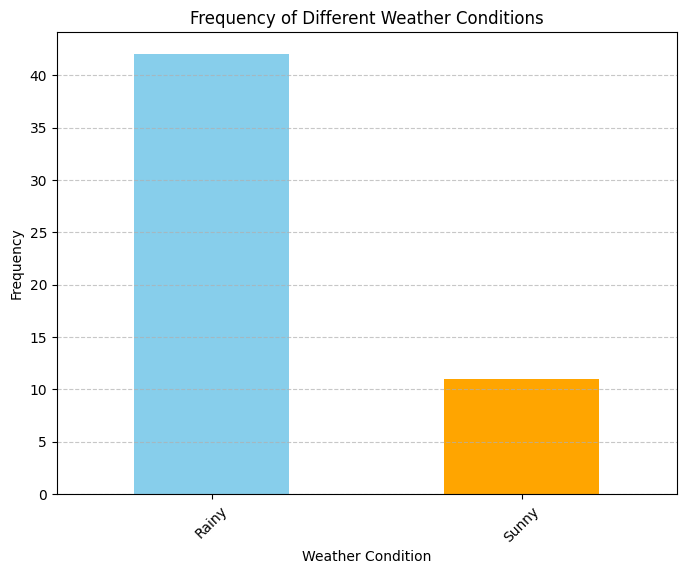

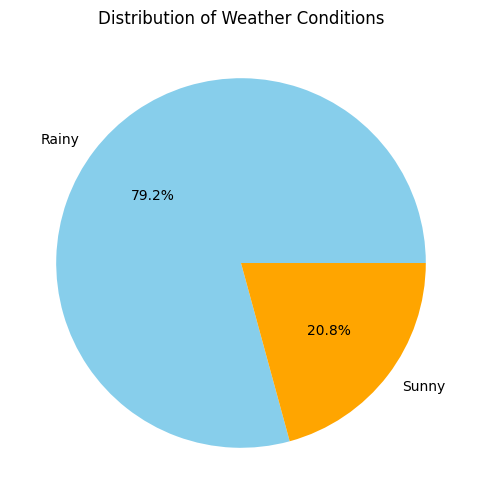

In [ ]:
Here are some suggestions for analyzing the dataset:

1. **Time Series Analysis**:
    - Plot rainfall, temperature, humidity, and wind speed over time to observe trends.
    - Identify any seasonal patterns or anomalies.

2. **Correlation Analysis**:
    - Compute the correlation matrix to understand relationships between variables like rainfall, temperature, humidity, and wind speed.
    - Visualize the correlation using a heatmap.

3. **Weather Condition Analysis**:
    - Analyze the frequency of different weather conditions.
    - Create a bar chart or pie chart to visualize the distribution of weather conditions.

4. **Extreme Weather Events**:
    - Identify days with extreme rainfall, high temperatures, or strong winds.
    - Analyze the impact of these extreme events on other variables.

5. **Monthly or Weekly Aggregation**:
    - Aggregate data by month or week to observe trends over time.
    - Compare average rainfall, temperature, and other variables across months or weeks.

6. **Outlier Detection**:
    - Identify outliers in rainfall, temperature, humidity, or wind speed using box plots or statistical methods.

7. **Rainfall Distribution**:
    - Analyze the distribution of rainfall using histograms or density plots.
    - Check if rainfall follows a specific probability distribution.

8. **Impact of Weather Conditions**:
    - Analyze how weather conditions (e.g., sunny, rainy) affect temperature, humidity, and wind speed.

9. **Clustering**:
    - Use clustering techniques (e.g., K-means) to group similar weather patterns.

10. **Predictive Analysis**:
     - Build a simple regression model to predict rainfall based on temperature, humidity, and wind speed.

Let me know if you'd like code for any specific analysis!

SyntaxError: unterminated string literal (detected at line 39) (3574327167.py, line 39)